## Calculate "breakeven" CO<sub>2</sub> price for CO<sub>2</sub>-based formic acid production

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# update plot formatting
mpl.rcParams.update({'font.size': 14})
mpl.rcParams.update({'mathtext.default': 'rm'})
mpl.rcParams.update({'font.family': 'sans-serif'})
mpl.rcParams.update({'font.sans-serif': 'Calibri'})

### constants

In [3]:
# tonne to kg (1 tonne = 1000 kg)
kg_per_tonne = 1000.0

# number of samples to generate on both axes
num = 50

### assumptions for carbon price

In [4]:
# LCFS credit cap ($/tonne CO2, adjusted for inflation)
# https://rmi.org/understanding-californias-low-carbon-fuel-standards-regulation/
# https://ww2.arb.ca.gov/resources/documents/lcfs-credit-clearance-market
max_co2_price_usd_per_t = 253.53 # 2023 price

### assumptions for conventional formic acid production

In [5]:
# production cost ($/kg formic acid)
# source: Dutta et al., 2022, Adv. Energy Mater.
conv_FA_cost_usd_per_kg = [0.6, 1.0]

# lifecycle emissions (kg CO2-eq/kg formic acid)
# source: Kang et al., 2021, Green Chem.
conv_FA_ghg_kgCO2_per_kg = 1.48

### assumptions for CO<sub>2</sub>-based formic acid production

In [6]:
# range production cost ($/kg formic acid)
co2_FA_cost_usd_per_kg = np.linspace(0.5, 3.5, num)

co2_FA_cost_usd_per_kg

array([0.5       , 0.56122449, 0.62244898, 0.68367347, 0.74489796,
       0.80612245, 0.86734694, 0.92857143, 0.98979592, 1.05102041,
       1.1122449 , 1.17346939, 1.23469388, 1.29591837, 1.35714286,
       1.41836735, 1.47959184, 1.54081633, 1.60204082, 1.66326531,
       1.7244898 , 1.78571429, 1.84693878, 1.90816327, 1.96938776,
       2.03061224, 2.09183673, 2.15306122, 2.21428571, 2.2755102 ,
       2.33673469, 2.39795918, 2.45918367, 2.52040816, 2.58163265,
       2.64285714, 2.70408163, 2.76530612, 2.82653061, 2.8877551 ,
       2.94897959, 3.01020408, 3.07142857, 3.13265306, 3.19387755,
       3.25510204, 3.31632653, 3.37755102, 3.43877551, 3.5       ])

In [7]:
# range lifecycle emissions (kg CO2-eq/kg formic acid)
# source: Kang et al., 2021, Green Chem.
co2_FA_ghg_kgCO2_per_kg = np.linspace(-0.5, 0.3, num)

co2_FA_ghg_kgCO2_per_kg

array([-0.5       , -0.48367347, -0.46734694, -0.45102041, -0.43469388,
       -0.41836735, -0.40204082, -0.38571429, -0.36938776, -0.35306122,
       -0.33673469, -0.32040816, -0.30408163, -0.2877551 , -0.27142857,
       -0.25510204, -0.23877551, -0.22244898, -0.20612245, -0.18979592,
       -0.17346939, -0.15714286, -0.14081633, -0.1244898 , -0.10816327,
       -0.09183673, -0.0755102 , -0.05918367, -0.04285714, -0.02653061,
       -0.01020408,  0.00612245,  0.02244898,  0.03877551,  0.05510204,
        0.07142857,  0.0877551 ,  0.10408163,  0.12040816,  0.13673469,
        0.15306122,  0.16938776,  0.18571429,  0.20204082,  0.21836735,
        0.23469388,  0.25102041,  0.26734694,  0.28367347,  0.3       ])

In [8]:
# create 2-D grid of production cost and emissions
co2_FA_cost_usd_per_kg_2d, \
co2_FA_ghg_kgCO2_per_kg_2d = np.meshgrid(
    co2_FA_cost_usd_per_kg, co2_FA_ghg_kgCO2_per_kg)

In [9]:
co2_FA_cost_usd_per_kg_2d

array([[0.5       , 0.56122449, 0.62244898, ..., 3.37755102, 3.43877551,
        3.5       ],
       [0.5       , 0.56122449, 0.62244898, ..., 3.37755102, 3.43877551,
        3.5       ],
       [0.5       , 0.56122449, 0.62244898, ..., 3.37755102, 3.43877551,
        3.5       ],
       ...,
       [0.5       , 0.56122449, 0.62244898, ..., 3.37755102, 3.43877551,
        3.5       ],
       [0.5       , 0.56122449, 0.62244898, ..., 3.37755102, 3.43877551,
        3.5       ],
       [0.5       , 0.56122449, 0.62244898, ..., 3.37755102, 3.43877551,
        3.5       ]])

In [10]:
co2_FA_ghg_kgCO2_per_kg_2d

array([[-0.5       , -0.5       , -0.5       , ..., -0.5       ,
        -0.5       , -0.5       ],
       [-0.48367347, -0.48367347, -0.48367347, ..., -0.48367347,
        -0.48367347, -0.48367347],
       [-0.46734694, -0.46734694, -0.46734694, ..., -0.46734694,
        -0.46734694, -0.46734694],
       ...,
       [ 0.26734694,  0.26734694,  0.26734694, ...,  0.26734694,
         0.26734694,  0.26734694],
       [ 0.28367347,  0.28367347,  0.28367347, ...,  0.28367347,
         0.28367347,  0.28367347],
       [ 0.3       ,  0.3       ,  0.3       , ...,  0.3       ,
         0.3       ,  0.3       ]])

### calculate "breakeven" CO<sub>2</sub> price

In [11]:
# "green premium" ($/kg formic acid)
# = difference between CO2-based and conventional production

diff_FA_cost_usd_per_kg_2d = []

for c in conv_FA_cost_usd_per_kg:
    diff_FA_cost_usd_per_kg_2d.append(
        co2_FA_cost_usd_per_kg_2d - c
    )

diff_FA_cost_usd_per_kg_2d

[array([[-0.1       , -0.03877551,  0.02244898, ...,  2.77755102,
          2.83877551,  2.9       ],
        [-0.1       , -0.03877551,  0.02244898, ...,  2.77755102,
          2.83877551,  2.9       ],
        [-0.1       , -0.03877551,  0.02244898, ...,  2.77755102,
          2.83877551,  2.9       ],
        ...,
        [-0.1       , -0.03877551,  0.02244898, ...,  2.77755102,
          2.83877551,  2.9       ],
        [-0.1       , -0.03877551,  0.02244898, ...,  2.77755102,
          2.83877551,  2.9       ],
        [-0.1       , -0.03877551,  0.02244898, ...,  2.77755102,
          2.83877551,  2.9       ]]),
 array([[-0.5       , -0.43877551, -0.37755102, ...,  2.37755102,
          2.43877551,  2.5       ],
        [-0.5       , -0.43877551, -0.37755102, ...,  2.37755102,
          2.43877551,  2.5       ],
        [-0.5       , -0.43877551, -0.37755102, ...,  2.37755102,
          2.43877551,  2.5       ],
        ...,
        [-0.5       , -0.43877551, -0.37755102, ...,  

In [12]:
# CO2 reduction (kg CO2-eq/kg formic acid)
# = difference between conventional and CO2-based production
diff_FA_ghg_kgCO2_per_kg_2d = \
 conv_FA_ghg_kgCO2_per_kg - co2_FA_ghg_kgCO2_per_kg_2d

diff_FA_ghg_kgCO2_per_kg_2d

array([[1.98      , 1.98      , 1.98      , ..., 1.98      , 1.98      ,
        1.98      ],
       [1.96367347, 1.96367347, 1.96367347, ..., 1.96367347, 1.96367347,
        1.96367347],
       [1.94734694, 1.94734694, 1.94734694, ..., 1.94734694, 1.94734694,
        1.94734694],
       ...,
       [1.21265306, 1.21265306, 1.21265306, ..., 1.21265306, 1.21265306,
        1.21265306],
       [1.19632653, 1.19632653, 1.19632653, ..., 1.19632653, 1.19632653,
        1.19632653],
       [1.18      , 1.18      , 1.18      , ..., 1.18      , 1.18      ,
        1.18      ]])

In [13]:
# breakeven CO2 price ($/tonne CO2)
# = "green premium" / CO2 reduction

co2_price_usd_per_t_2d = []

for d in diff_FA_cost_usd_per_kg_2d:
    co2_price_usd_per_t_2d.append(
        d / diff_FA_ghg_kgCO2_per_kg_2d * \
        kg_per_tonne
    )

co2_price_usd_per_t_2d

[array([[ -50.50505051,  -19.58359101,   11.33786848, ..., 1402.80354566,
         1433.72500515, 1464.64646465],
        [ -50.92496363,  -19.74641447,   11.43213469, ..., 1414.46684681,
         1445.64539597, 1476.82394513],
        [ -51.35191784,  -19.91196814,   11.52798156, ..., 1426.32571788,
         1457.76566757, 1489.20561727],
        ...,
        [ -82.4638169 ,  -31.97576574,   18.51228543, ..., 2290.47458768,
         2340.96263884, 2391.45069   ],
        [ -83.5892187 ,  -32.41214603,   18.76492665, ..., 2321.73319686,
         2372.91026953, 2424.0873422 ],
        [ -84.74576271,  -32.86060187,   19.02455898, ..., 2353.85679696,
         2405.7419578 , 2457.62711864]]),
 array([[-252.52525253, -221.60379303, -190.68233354, ..., 1200.78334364,
         1231.70480313, 1262.62626263],
        [-254.62481813, -223.44626897, -192.26771981, ..., 1210.76699231,
         1241.94554147, 1273.12409063],
        [-256.75958918, -225.31963949, -193.87968979, ..., 1220.91804653,

### plot

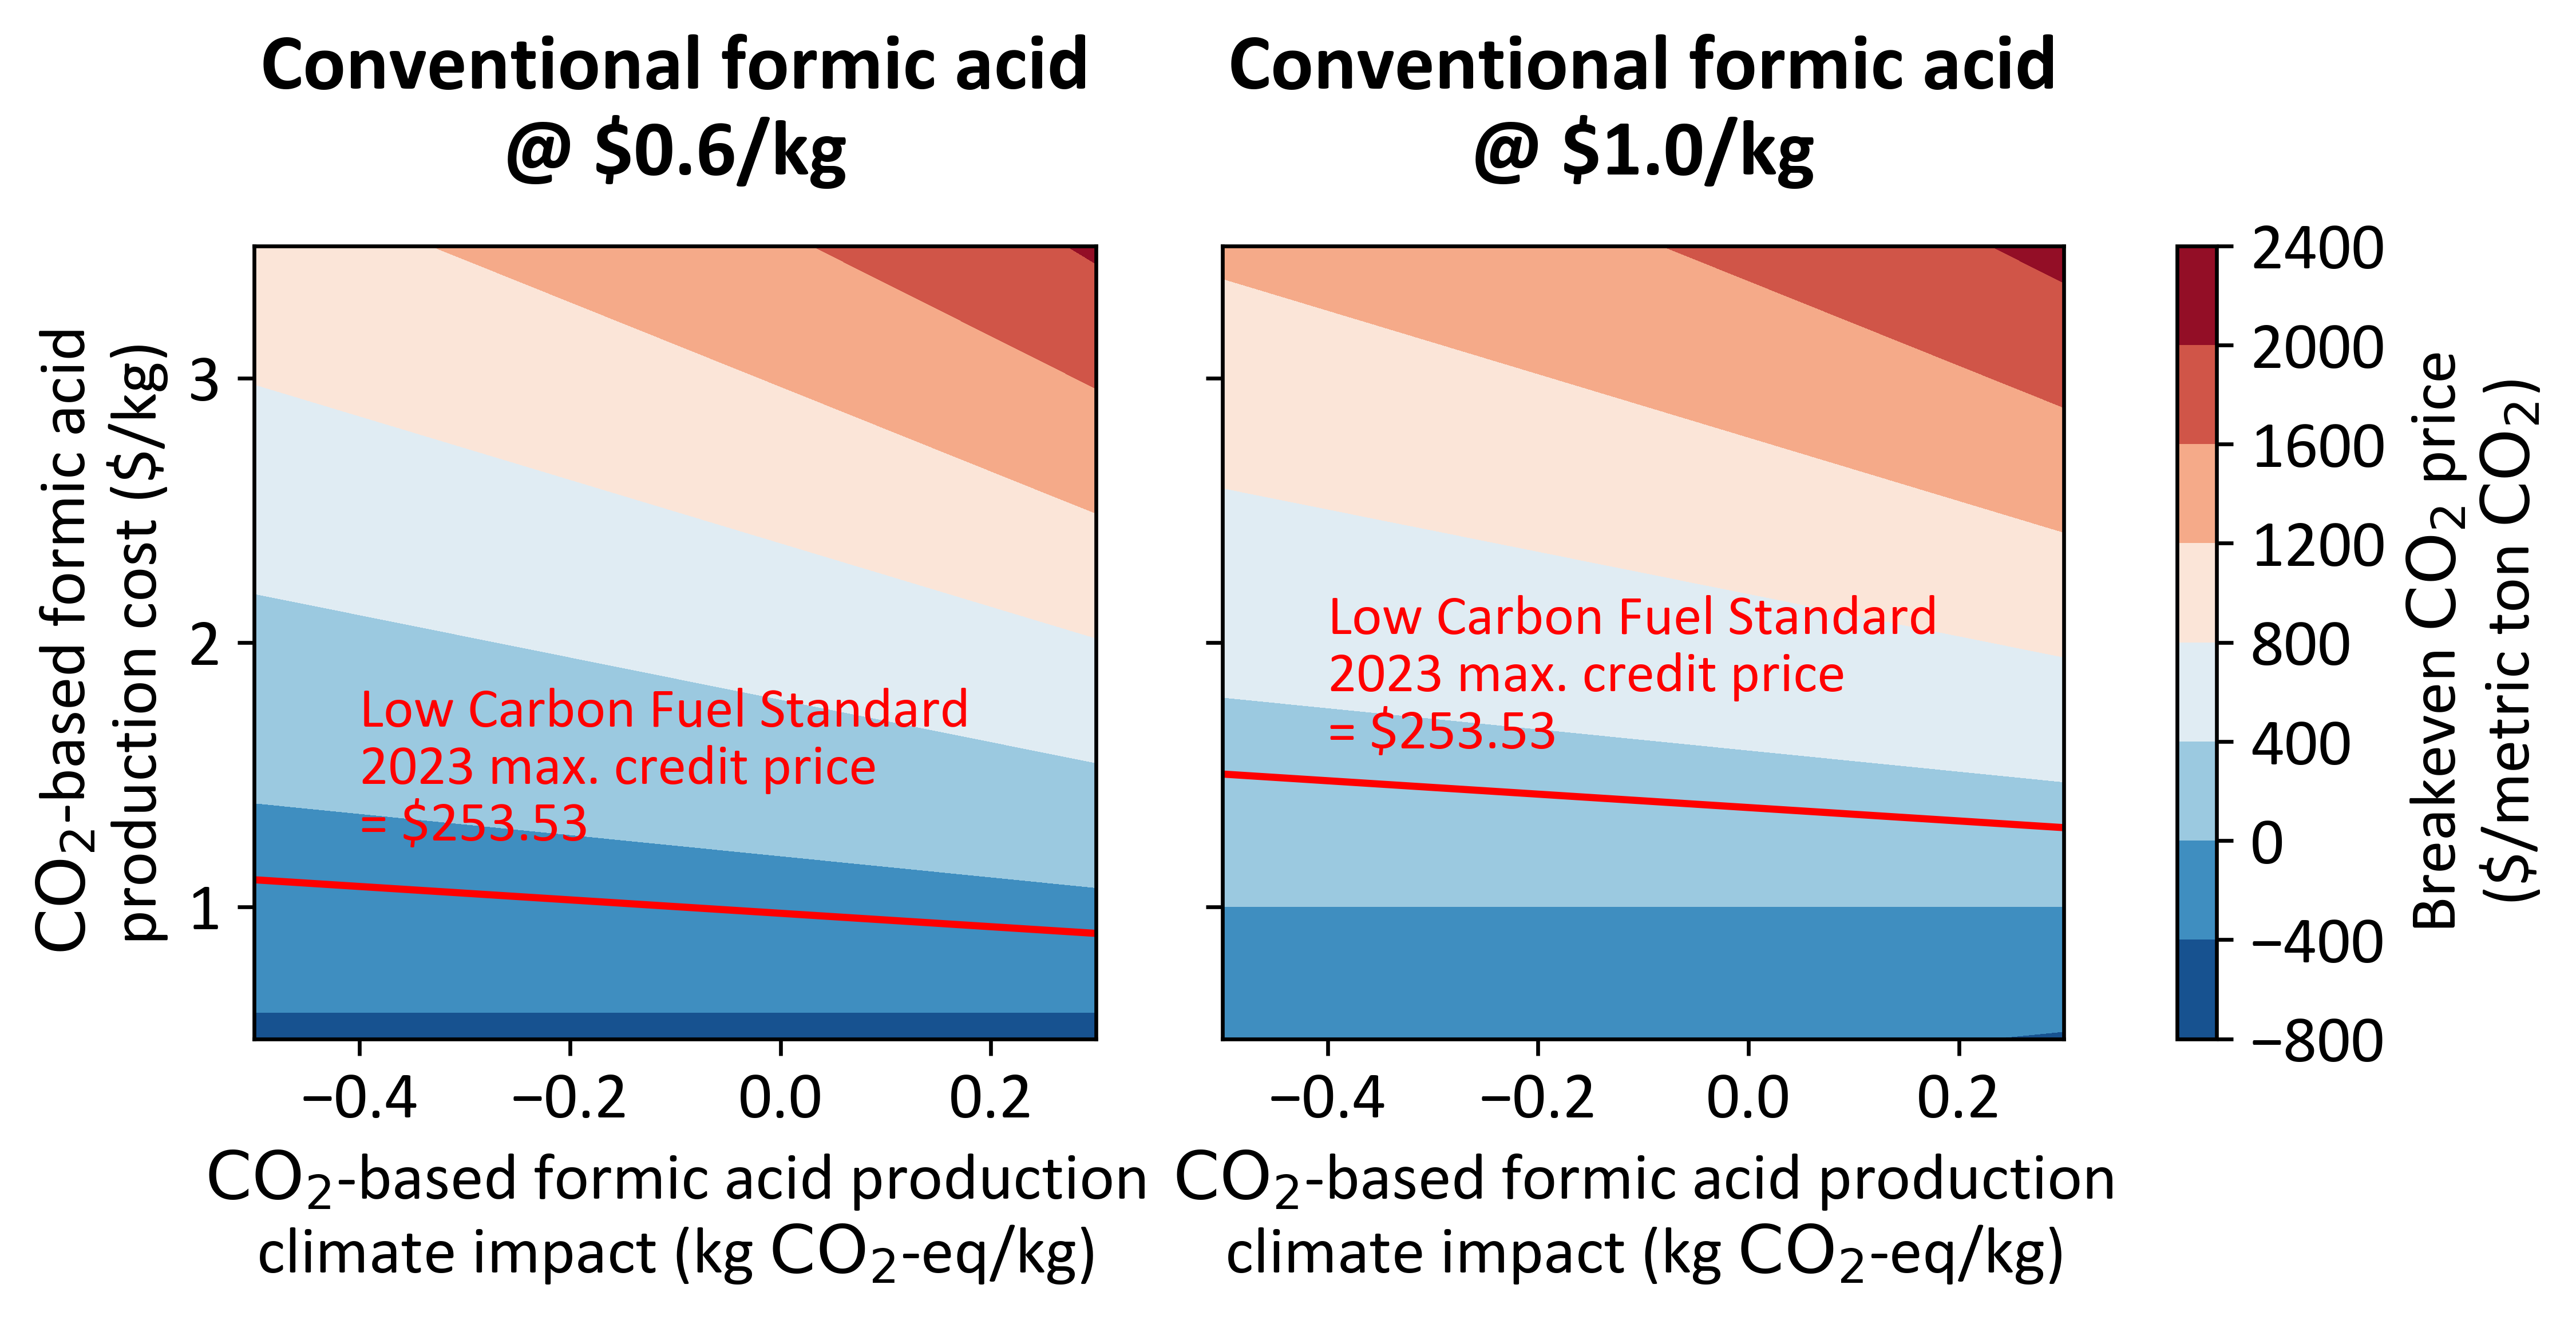

In [14]:
# annotation line / text color
ann_color = 'red'

# annotation text
ann_text = 'Low Carbon Fuel Standard\n' + \
    '2023 max. credit price\n= $253.53'

# set up plot
fig, ax = plt.subplots(
    ncols = len(co2_price_usd_per_t_2d),
    figsize = (8.5, 3),
    sharey = True,
    dpi = 600
)

plt.subplots_adjust(wspace = 0.15)

# fill subplots
for i in range(len(co2_price_usd_per_t_2d)):

    # plot breakeven CO2 price
    cm = ax[i].contourf(
        co2_FA_ghg_kgCO2_per_kg_2d, 
        co2_FA_cost_usd_per_kg_2d,
        co2_price_usd_per_t_2d[i],
        cmap = 'RdBu_r',
        )

    # add CO2 price cap
    ax[i].contour(
        cm,
        levels = np.array([max_co2_price_usd_per_t]),
        colors = ann_color
        )

    # add subplot title
    ax[i].set_title(
        r'Conventional formic acid' + '\n'
        '@ ${}/kg'.format(
            conv_FA_cost_usd_per_kg[i],
            conv_FA_ghg_kgCO2_per_kg
        ),
        fontweight = 'bold',
        pad = 15
    )
    
    # set x-axis label
    ax[i].set_xlabel(
        r'$CO_2$-based formic acid production' + '\n' + \
        'climate impact (kg ${CO_2}$-eq/kg)',
    )
    
# set y-axis label
ax[0].set_ylabel(
    r'$CO_2$-based formic acid' + '\n' + \
    'production cost ($/kg)'
)

# add annotation
ax[0].annotate(
    ann_text,
    xy = (-0.4, 1.25),
    color = ann_color,
    fontsize = 12,
    horizontalalignment = 'left',
)

ax[1].annotate(
    ann_text,
    xy = (-0.4, 1.6),
    color = ann_color,
    fontsize = 12,
    horizontalalignment = 'left',
)

# add colorbar
fig.colorbar(
    cm, 
    ax = ax,
    pad = 0.05,
    label = 'Breakeven ${CO_2}$ price\n' + \
        '(\\$/metric ton ${CO_2}$)'
    )

# save plot
plt.savefig(
    'CO2 breakeven price.png',
    bbox_inches = 'tight'
    )

plt.show()